### Plotting Median Income
*Comparing individual and family incomes

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

In [3]:
len(file)

38158

In [4]:
#Removing N/A income records (value = 9999999)
file = file[file.INCTOT != 9999999]

In [5]:
len(file)

32681

------------------

### (1) *Individual* Income

In [6]:
indiv_income = {}
for year in range(2006, 2018):
    df = file[file.YEAR == year]
    incomes = np.array([])
    for i, row in df[['INCTOT', 'PERWT']].iterrows():
        income = np.full(row.PERWT, row.INCTOT)
        incomes = np.append(incomes, income)
    indiv_income[year] = np.median(incomes)

In [7]:
indiv_income

{2006: 14400.0,
 2007: 16000.0,
 2008: 15000.0,
 2009: 14310.0,
 2010: 12800.0,
 2011: 12000.0,
 2012: 12000.0,
 2013: 13900.0,
 2014: 15000.0,
 2015: 14900.0,
 2016: 17000.0,
 2017: 19100.0}

In [8]:
individual = pd.DataFrame.from_dict(indiv_income, orient='index')
individual = individual.reset_index().rename({'index':'Year', 0:'Income'}, axis=1)
yr = individual.Year.astype('str')
individual.Year = pd.to_datetime(yr)

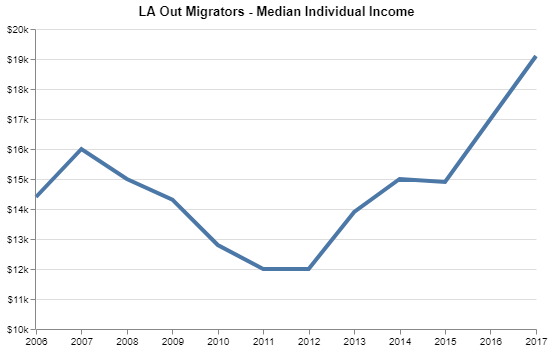

In [17]:
alt.Chart(individual).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', 
            axis=alt.Axis(grid=False, labelFlush=False), 
            title=None),
    y=alt.Y('Income', 
            scale=alt.Scale(domain=[10000,20000]), 
            axis=alt.Axis(offset=1, format='$s'), 
            title=None)
).properties(title='LA Out Migrators - Median Individual Income', width=500
).configure_view(strokeWidth=0)

-----------------

### (2) *Family* Income

In [10]:
fam_income = {}
for year in range(2006, 2018):
    df = file[file.YEAR == year]
    incomes = np.array([])
    for i, row in df[['FTOTINC', 'PERWT']].iterrows():
        income = np.full(row.PERWT, row.FTOTINC)
        incomes = np.append(incomes, income)
    fam_income[year] = np.median(incomes)

In [11]:
fam_income

{2006: 50200.0,
 2007: 55000.0,
 2008: 59950.0,
 2009: 60000.0,
 2010: 65000.0,
 2011: 60000.0,
 2012: 55000.0,
 2013: 64550.0,
 2014: 61000.0,
 2015: 65000.0,
 2016: 70100.0,
 2017: 68200.0}

In [12]:
family = pd.DataFrame.from_dict(fam_income, orient='index')
family = family.reset_index().rename({'index':'Year', 0:'Income'}, axis=1)
yr = family.Year.astype('str')
family.Year = pd.to_datetime(yr)

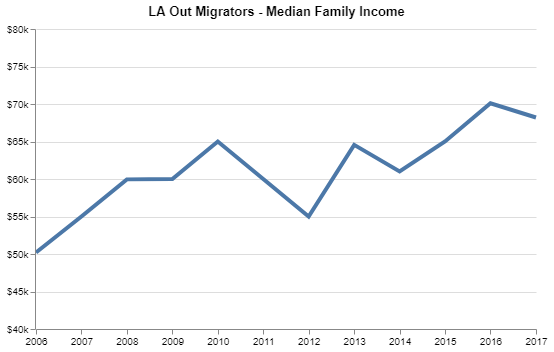

In [16]:
alt.Chart(family).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', 
            axis=alt.Axis(grid=False, labelFlush=False), 
            title=None),
    y=alt.Y('Income', 
            scale=alt.Scale(domain=[45000,75000]), 
            axis=alt.Axis(offset=1, format='$s'), 
            title=None)
).properties(title='LA Out Migrators - Median Family Income', width=500
).configure_view(strokeWidth=0)